# Question 4

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting/graphical functionality

%matplotlib inline

In [75]:
df_train_data = pd.read_csv('train.csv')
df_test_data = pd.read_csv('test.csv')
df_train_data.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


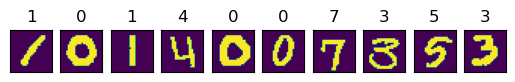

In [76]:
df_train_labels = df_train_data['label']
df_train_data = df_train_data.drop(['label'], axis=1)

for i in range(10):
    ax= plt.subplot(1,10 ,i+1)
    im=ax.imshow(df_train_data.iloc[i].values.reshape(28,28))
    plt.xlabel=''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title(df_train_labels.iloc[i])

# euclid_distance

In [77]:
def euclid_distance(p1, p2):

    # Create an integer to store the running total sum
    sum_of_square_distances = 0
    for a,b in zip(p1,p2):
        
        distance_in_this_dimension_squared = (a - b)**2
        sum_of_square_distances = sum_of_square_distances + distance_in_this_dimension_squared
    
    # The euclidean distance is the square root of the sum of all of the (distances in each dimension squared)
    euclidean_distance = np.sqrt(sum_of_square_distances)
    
    return euclidean_distance




# example
point1 = (1,1)
point2 = (1,2)

print(euclid_distance(point1, point2))

1.0


# labels_of_nearest_neighbours

In [78]:
def labels_of_nearest_neighbours(np_list_of_distances, np_list_of_labels, k):

    # reshape both input lists from a row to a column
    np_list_of_distances = np_list_of_distances.reshape(-1,1)
    np_list_of_labels = np_list_of_labels.reshape(-1,1)
    
    # can now join the 2 columns together into an array and convert into a dataframe
    np_distances_and_labels = np.concatenate((np_list_of_distances,np_list_of_labels), axis = 1)
    labels_df = pd.DataFrame(np_distances_and_labels, columns=['distance','label'])
    
    # sort the entries in the dataframe by distance
    labels_df = labels_df.sort_values('distance')
    return labels_df['label'].head(k).values

# most_common_label

In [79]:
def most_common_label(np_arr_of_labels):
    unique_labels, counts = np.unique(np_arr_of_labels, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common = unique_labels[most_common_index]
    return most_common

In [80]:
def simple_KNN( new_point, existing_points, labels_for_existing_points, k=3):
    row_count_of_existing_points = existing_points.shape[0]
    # Create an empty list of the distances
    list_of_distances = []
    
    # For each known point, calculate the euclidean distance between the known point and the new point
    for i in range(row_count_of_existing_points):
        this_distance = euclid_distance(new_point, existing_points.iloc[i])
        list_of_distances.append(this_distance)
    
    
    # smallest distance to the new point
    labels_of_k_nearest_neighbours = labels_of_nearest_neighbours(np.array(list_of_distances), np.array(labels_for_existing_points), k)
    
    # Identify the most common label in the nearest neighbours. This is the predicted label for the new point
    predicted_label_of_new_point = most_common_label(labels_of_k_nearest_neighbours)
    return predicted_label_of_new_point

# df_test_data

In [81]:
df_test_data.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Display the first images in the test set

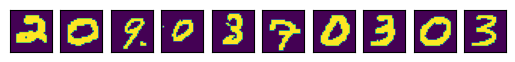

In [82]:

for i in range(10):
    ax= plt.subplot(1,10 ,i+1)
    im=ax.imshow(df_test_data.iloc[i].values.reshape(28,28))
    plt.xlabel=''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# test knn algorithm

In [83]:
test_point = df_test_data.iloc[0] # should be 2
print(test_point)

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64


# run knn

In [84]:
print(simple_KNN(test_point, df_train_data.head(1000), df_train_labels.head(1000)))

2.0


In [87]:
for i in range(10):
    test_point = df_test_data.iloc[i]
    print("label for picture number",i+1)
    print(simple_KNN(test_point, df_train_data.head(1000), df_train_labels.head(1000)))

label for picture number 1
2.0
label for picture number 2
0.0
label for picture number 3
9.0
label for picture number 4
9.0
label for picture number 5
3.0
label for picture number 6
7.0
label for picture number 7
0.0
label for picture number 8
3.0
label for picture number 9
0.0
label for picture number 10
3.0
